In [11]:
'''Imports'''
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits, fetch_california_housing



In [12]:
'''Configure Utilities'''
np.set_printoptions(suppress=True, precision=5)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [13]:
'''Load Data'''

coastline_shp = './geoData/califorina_pacific_coast-shapefile/3853-s3_2002_s3_reg_pacific_ocean.shp'
places_shp = './geoData/ca_places/CA_Places.shp'
counties_shp = './geoData/ca_counties/CA_Counties.shp'

coastline = gpd.read_file(coastline_shp)
places = gpd.read_file(places_shp)
counties = gpd.read_file(counties_shp)

cal_housing = fetch_california_housing(as_frame=True).data
rawData = cal_housing.copy()



In [14]:
'''Standardize Cordinate Projection'''
coastline = coastline.to_crs(counties.crs)
print(coastline.crs)
print(counties.crs)
print(places.crs)
# places.to_crs(coastline)
# counties.to_crs(coastline)

EPSG:3857
EPSG:3857
EPSG:3857


In [5]:
'''Set geo bounding box'''




'Set geo bounding box'

In [15]:
'''Convert Housing data to GeoData'''
print(rawData.columns)
cal_housing_geo = gpd.GeoDataFrame(rawData, geometry=gpd.points_from_xy(rawData.Longitude, rawData.Latitude), crs=counties.crs)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


In [30]:
# offset = 1
# MAX X
# xmax = counties.bounds['maxx'].max() + offset
# # MIN X
# xmin = counties.bounds['minx'].min() - offset

# # MAX Y
# ymax = counties.bounds['maxy'].max() + offset

# # Min X
# ymin = counties.bounds['miny'].min() - offset



# coastline = coastline.cx[xmin:xmax, ymin:ymax]
# counties = coastline.cx[xmin:xmax, ymin:ymax]
# places = coastline.cx[xmin:xmax, ymin:ymax]

# bounds = counties.envelope

counties.envelope

0     POLYGON ((-13476138.986 4777915.852, -13358431...
1     POLYGON ((-13565686.493 4582029.117, -13472674...
2     POLYGON ((-13440091.335 3949989.104, -13242871...
3     POLYGON ((-13469158.901 4555700.858, -13360561...
4     POLYGON ((-13317853.594 3917025.710, -13206110...
5     POLYGON ((-13241646.380 3862173.381, -13096335...
6     POLYGON ((-13762708.116 4589780.873, -13619657...
7     POLYGON ((-13393413.517 4271583.291, -13299825...
8     POLYGON ((-13092406.987 3832930.617, -12922072...
9     POLYGON ((-13523587.691 4680416.023, -13358614...
10    POLYGON ((-13711648.962 4528670.761, -13612346...
11    POLYGON ((-13707273.889 4553317.608, -13619657...
12    POLYGON ((-13402360.621 4464661.214, -13281227...
13    POLYGON ((-13506655.581 4823551.200, -13357850...
14    POLYGON ((-13652938.619 4601336.535, -13587812...
15    POLYGON ((-13699961.897 4907500.012, -13505279...
16    POLYGON ((-13586754.363 4271624.322, -13382160...
17    POLYGON ((-13761750.133 4862603.454, -1363

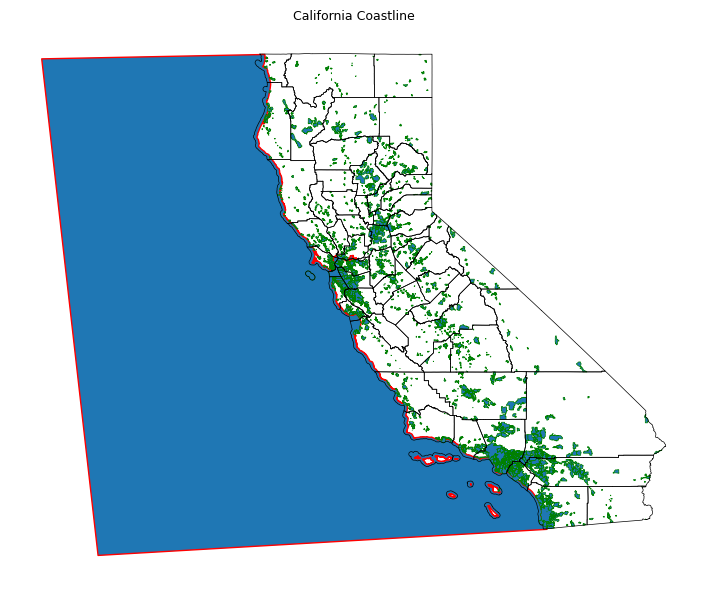

In [29]:
'''Graph Coast, County and Places data'''

fig, ax = plt.subplots(1, 1, figsize=(8, 6), tight_layout=True)
ax.set_title("California Coastline", fontsize=9)
coastline.plot(ax=ax, edgecolor="red", linewidth=1.0)
counties.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5)
places.plot(ax=ax, edgecolor='green', linewidth=0.5)
# cal_housing_geo.plot(ax=ax, edgecolor='green', linewidth=.5)
ax.axis("off")
# ax.set_xlim(xmin,xmax)
# ax.set_ylim(ymin,ymax)
plt.show()

/var/folders/mq/kwq9hyvd6w3cxcg_djgcynpr0000gn/T/ipykernel_55980/2502396495.py:4: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  coastline.plot(ax=ax, edgecolor="red", linewidth=1.0)
/var/folders/mq/kwq9hyvd6w3cxcg_djgcynpr0000gn/T/ipykernel_55980/2502396495.py:5: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  counties.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5)
/var/folders/mq/kwq9hyvd6w3cxcg_djgcynpr0000gn/T/ipykernel_55980/2502396495.py:6: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  places.plot(ax=ax, edgecolor='green', linewidth=0.5)


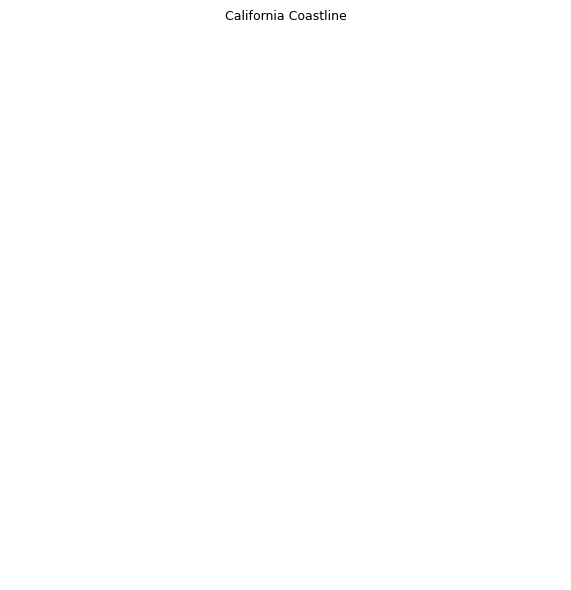

In [9]:
'''Overlay housing data on our visualization'''
fig, ax = plt.subplots(1, 1, figsize=(8, 6), tight_layout=True)
ax.set_title("California Coastline", fontsize=9)
coastline.plot(ax=ax, edgecolor="red", linewidth=1.0)
counties.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5)
places.plot(ax=ax, edgecolor='green', linewidth=0.5)

ax.axis("off")
plt.show()